In [ ]:
!pip install feature-engine

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 375.0/375.0 kB 19.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

In [ ]:
df=pd.read_csv('loan_data.csv')

In [ ]:
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [ ]:
df['person_age'] = df['person_age'].astype('int')
df['person_age'].dtypes

dtype('int64')

In [ ]:
cat_cols = [var for var in df.columns if df[var].dtypes == 'object']
num_cols = [var for var in df.columns if df[var].dtypes != 'object']

In [ ]:
cat_cols, num_cols

(['person_gender',
  'person_education',
  'person_home_ownership',
  'loan_intent',
  'previous_loan_defaults_on_file'],
 ['person_age',
  'person_income',
  'person_emp_exp',
  'loan_amnt',
  'loan_int_rate',
  'loan_percent_income',
  'cb_person_cred_hist_length',
  'credit_score',
  'loan_status'])

In [ ]:
df['person_gender'].value_counts()

,count
person_gender,
male,24841
female,20159


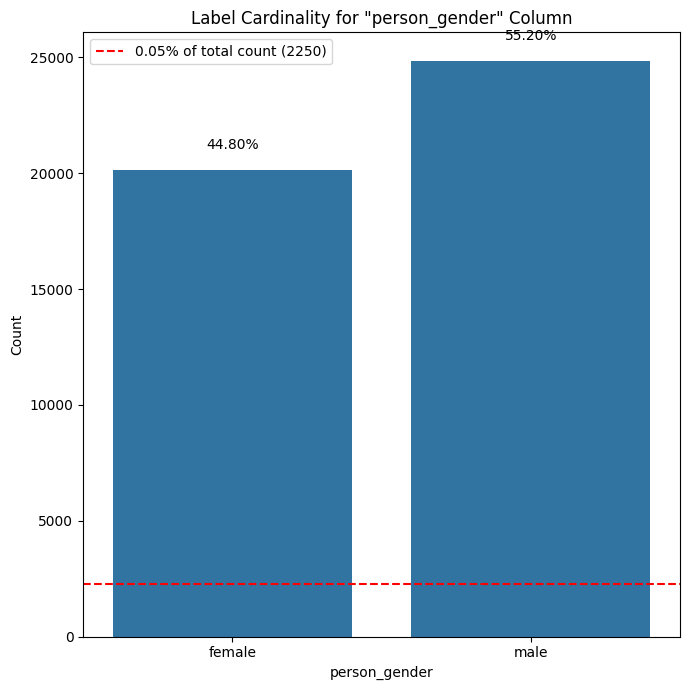

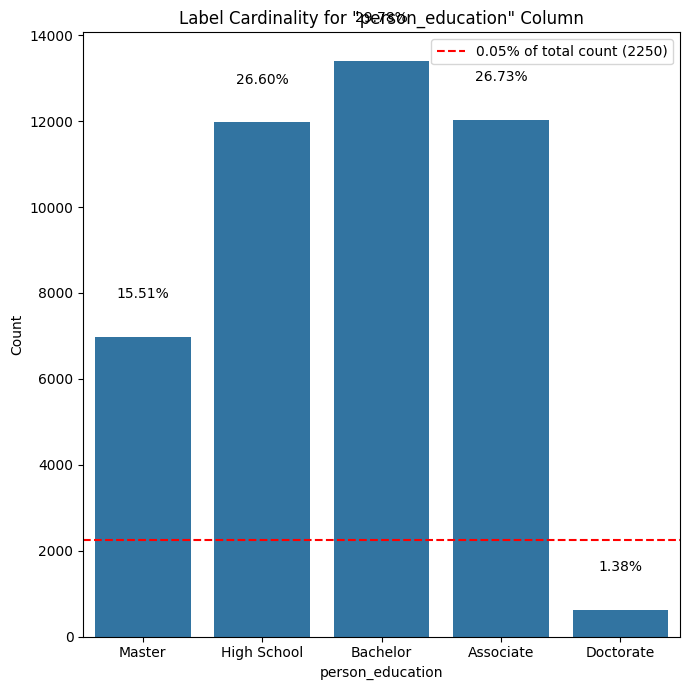

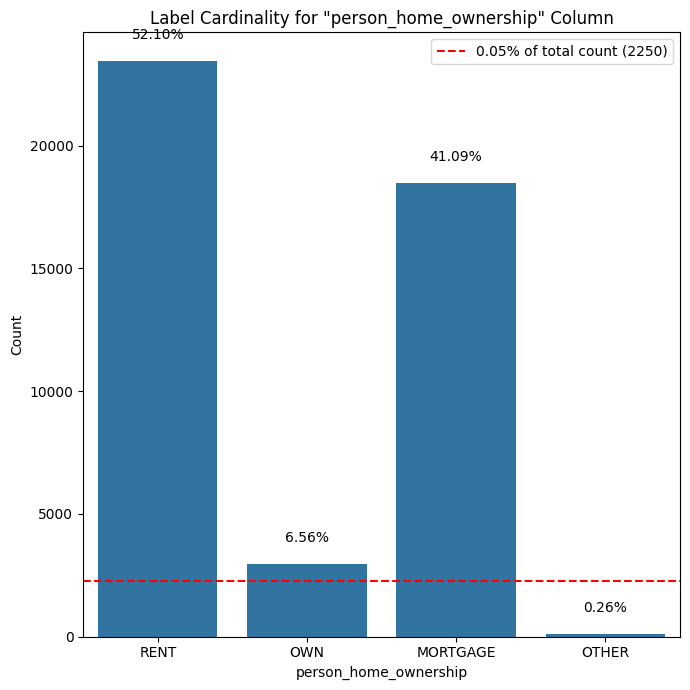

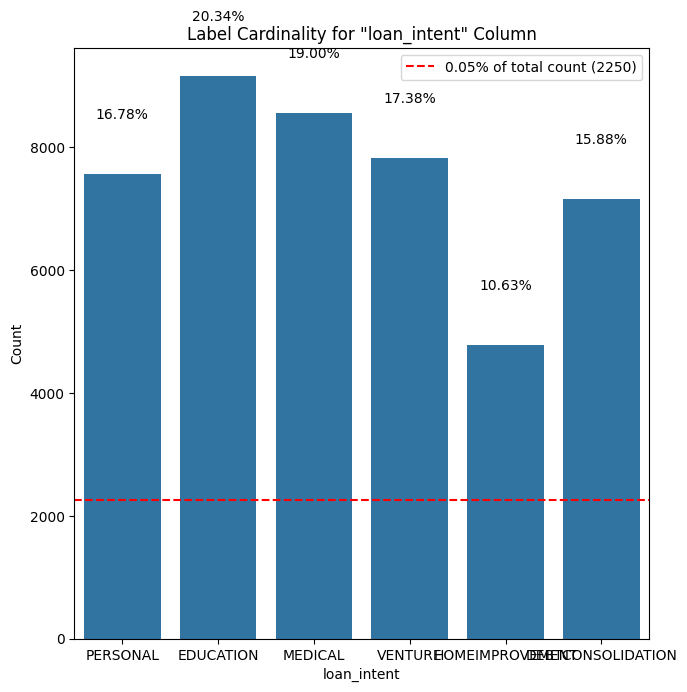

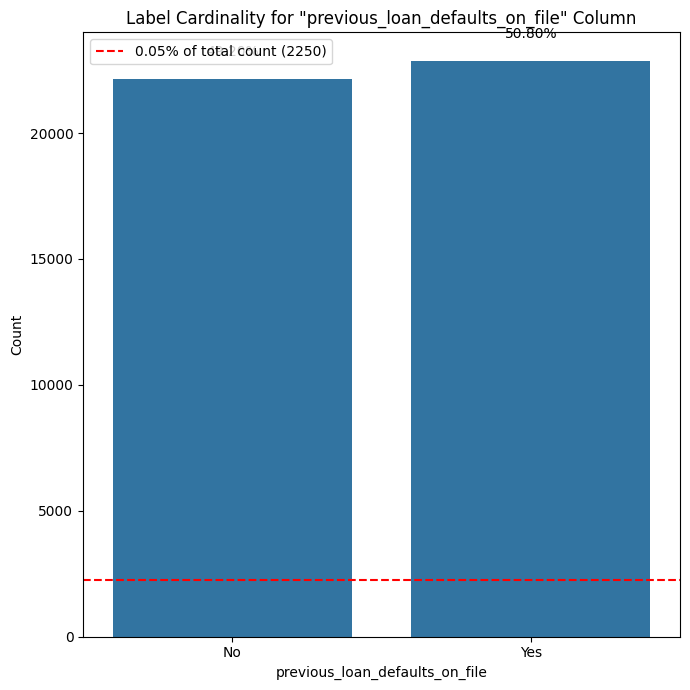

In [ ]:
def plot_categorical_column(dataframe, column):

    plt.figure(figsize=(7, 7))
    ax = sns.countplot(x=dataframe[column])
    total_count = len(dataframe[column])
    threshold = 0.05 * total_count
    category_counts = dataframe[column].value_counts(normalize=True) * 100
    ax.axhline(threshold, color='red', linestyle='--', label=f'0.05% of total count ({threshold:.0f})')

    for p in ax.patches:
        height = p.get_height()
        percentage = (height / total_count) * 100
        ax.text(p.get_x() + p.get_width() / 2., height + 0.02 * total_count, f'{percentage:.2f}%', ha="center")

    plt.title(f'Label Cardinality for "{column}" Column')
    plt.ylabel('Count')
    plt.xlabel(column)
    plt.tight_layout()

    plt.legend()
    plt.show()

for col in cat_cols:
    plot_categorical_column(df, col)

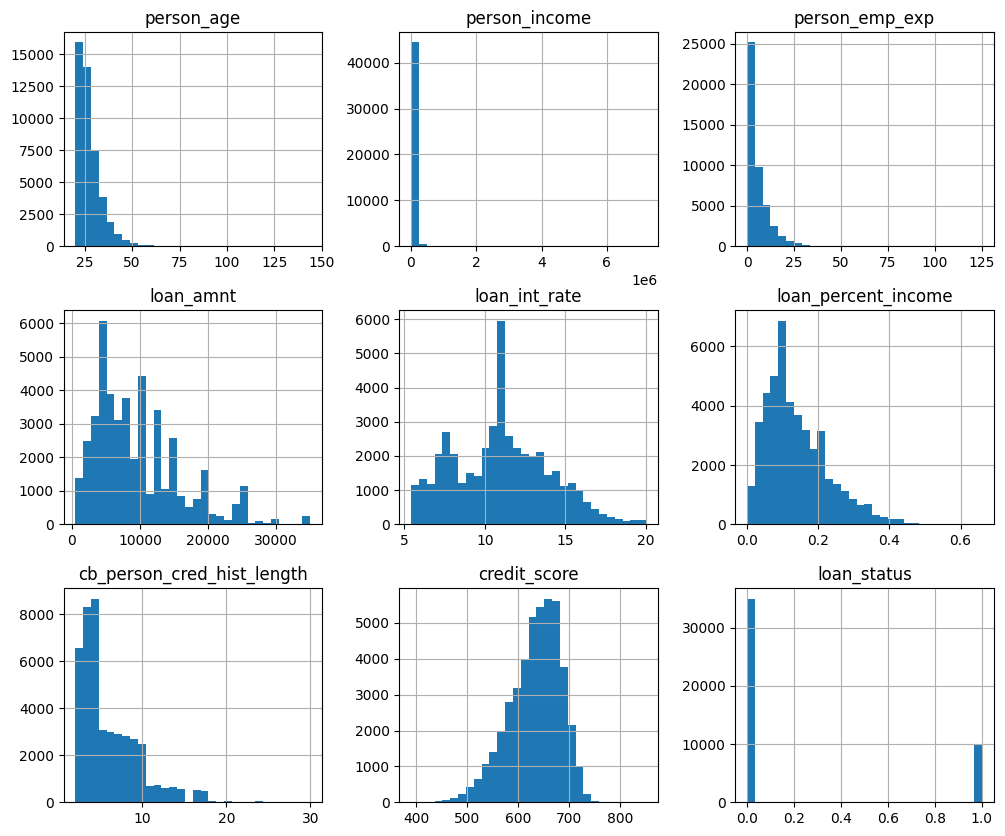

In [ ]:
df[num_cols].hist(bins=30, figsize=(12,10))
plt.show()

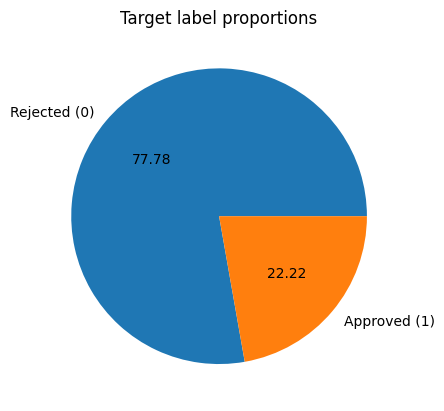

In [ ]:
label_prop = df['loan_status'].value_counts()

plt.pie(label_prop.values, labels=['Rejected (0)', 'Approved (1)'], autopct='%.2f')
plt.title('Target label proportions')
plt.show()

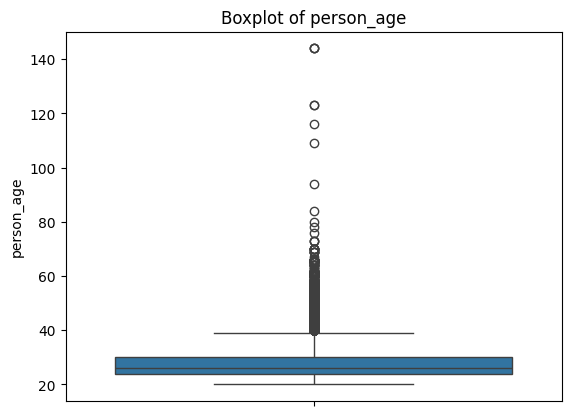

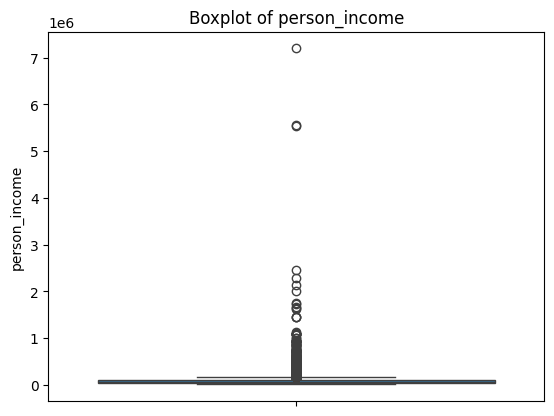

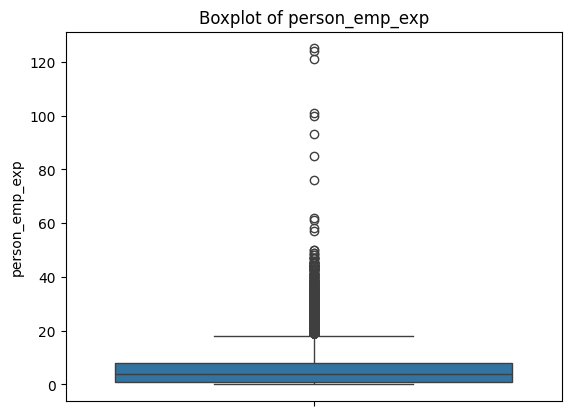

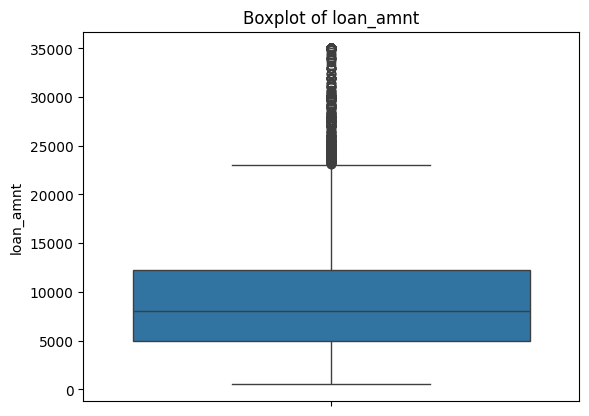

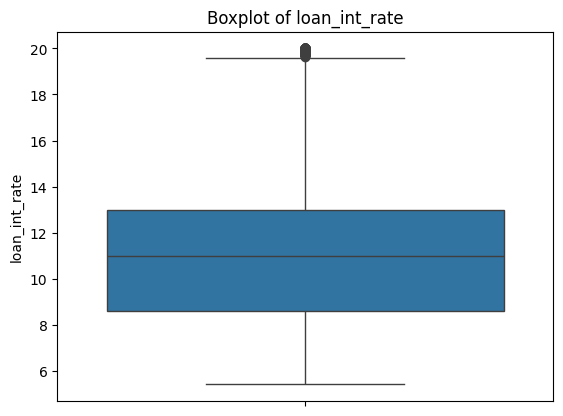

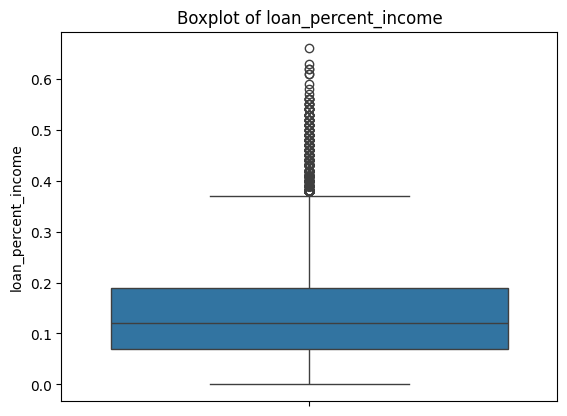

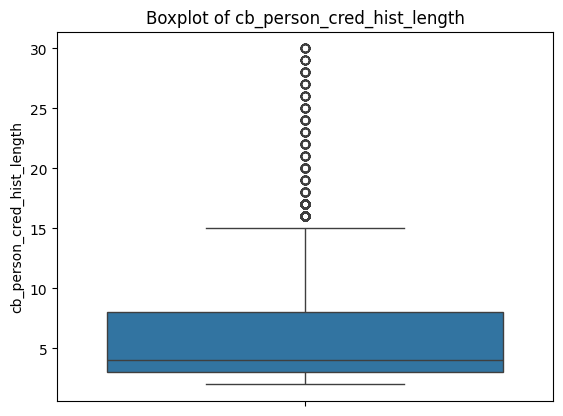

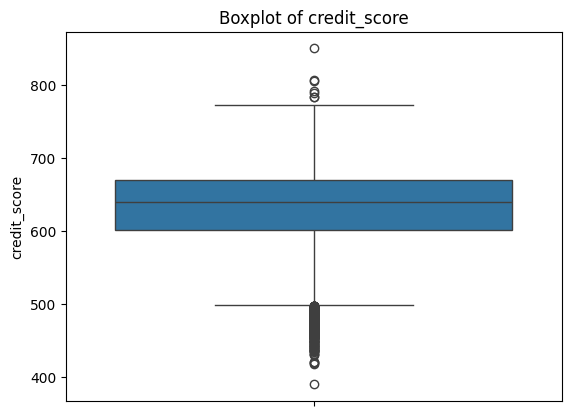

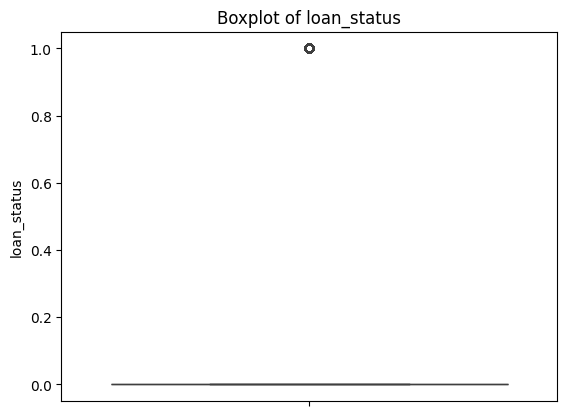

In [ ]:
for col in num_cols:
    sns.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [ ]:
skewed_cols = ['person_age', 'person_income', 'person_emp_exp',
               'loan_amnt', 'loan_percent_income',
               'cb_person_cred_hist_length', 'credit_score']

norm_cols= ['loan_int_rate']

In [ ]:
mms = MinMaxScaler()
ss = StandardScaler()

df[skewed_cols] = ss.fit_transform(df[skewed_cols])
df[skewed_cols] = ss.transform(df[skewed_cols])

df[norm_cols] = mms.fit_transform(df[norm_cols])
df[norm_cols] = mms.transform(df[norm_cols])

In [ ]:
df['person_education'].replace({
    'High School': 0,
    'Associate': 1,
    'Bachelor': 2,
    'Master': 3,
    'Doctorate':4
}, inplace=True)

df['person_education'].replace({
    'High School': 0,
    'Associate': 1,
    'Bachelor': 2,
    'Master': 3,
    'Doctorate':4
}, inplace=True)

In [ ]:
df["person_home_ownership"].value_counts()

,count
person_home_ownership,
RENT,23443
MORTGAGE,18489
OWN,2951
OTHER,117


In [ ]:
df["loan_intent"].value_counts()

,count
loan_intent,
EDUCATION,9153
MEDICAL,8548
VENTURE,7819
PERSONAL,7552
DEBTCONSOLIDATION,7145
HOMEIMPROVEMENT,4783


In [ ]:
df["previous_loan_defaults_on_file"].value_counts()

,count
previous_loan_defaults_on_file,
Yes,22858
No,22142


In [ ]:
df["person_gender"].value_counts()

,count
person_gender,
male,24841
female,20159


In [ ]:
gender_mapping = {'male': 0, 'female': 1}
home_ownership_mapping = {'RENT': 0, 'OWN': 1, 'MORTGAGE': 2, 'OTHER': 3}
loan_intent_mapping = {'PERSONAL': 0, 'EDUCATION': 1, 'MEDICAL': 2, 'VENTURE': 3, 'HOMEIMPROVEMENT': 4, 'DEBTCONSOLIDATION': 5}
previous_loan_defaults_mapping = {'No': 0, 'Yes': 1}

df['person_gender'] = df['person_gender'].map(gender_mapping)
df['person_home_ownership'] = df['person_home_ownership'].map(home_ownership_mapping)
df['loan_intent'] = df['loan_intent'].map(loan_intent_mapping)
df['previous_loan_defaults_on_file'] = df['previous_loan_defaults_on_file'].map(previous_loan_defaults_mapping)

In [ ]:
df.isnull().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


In [ ]:
from feature_engine.outliers import OutlierTrimmer

trimmer = OutlierTrimmer(capping_method='iqr', tail='right',
                        variables= ['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt',
       'loan_intent', 'loan_int_rate', 'loan_percent_income',
       'cb_person_cred_hist_length', 'credit_score',
       'previous_loan_defaults_on_file'])

df2 = trimmer.fit_transform(df)

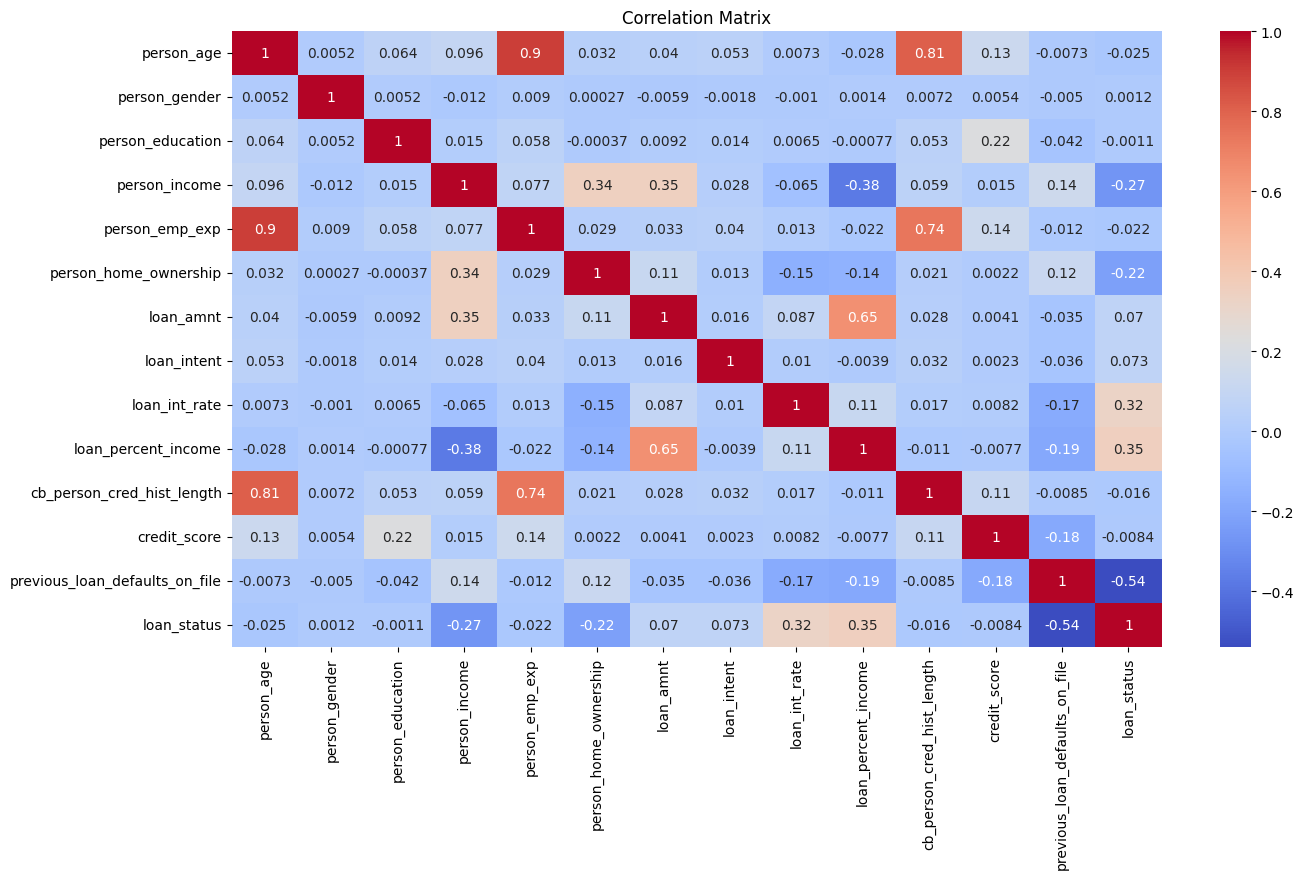

In [ ]:
plt.figure(figsize=(15, 8))
sns.heatmap(df2.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
threshold = 0.1

correlation_matrix = df2.corr()
high_corr_features = correlation_matrix.index[abs(correlation_matrix["loan_status"]) > threshold].tolist()
high_corr_features.remove("loan_status")
print(high_corr_features)

X_selected = df[high_corr_features]
Y = df["loan_status"]

['person_income', 'person_home_ownership', 'loan_int_rate', 'loan_percent_income', 'previous_loan_defaults_on_file']


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)



catboost_model = CatBoostClassifier(verbose=0)
catboost_search = GridSearchCV(catboost_model, catboost_params, cv=3, scoring='accuracy', n_jobs=-1)
catboost_search.fit(X_train, Y_train)
best_catboost = catboost_search.best_estimator_



xgboost_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgboost_search = GridSearchCV(xgboost_model, xgboost_params, cv=3, scoring='accuracy', n_jobs=-1)
xgboost_search.fit(X_train, Y_train)
best_xgboost = xgboost_search.best_estimator_

classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVC': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Tuned CatBoost': best_catboost,
    'Tuned XGBoost': best_xgboost
}


for name, model in classifiers.items():
    try:
        model.fit(X_train, Y_train)
        Y_train_pred = model.predict(X_train)
        Y_pred = model.predict(X_test)
        print(f'\n{name}:')
        print(f'Train Accuracy = {accuracy_score(Y_train, Y_train_pred):.4f}')
        print(f'Test Accuracy = {accuracy_score(Y_test, Y_pred):.4f}')
        print(classification_report(Y_test, Y_pred))
    except Exception as e:
        print(f'{name}: Skipped due to error - {e}')

((33750, 5), (33750,), (11250, 5), (11250,))

In [ ]:
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

In [ ]:
model = LogisticRegression(max_iter=1200, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1200, random_state=42)

In [ ]:

model.score(X_train, y_train)

0.8709037037037037

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
print(accuracy_score(y_test, y_pred))

0.8642666666666666


In [ ]:
model2 = SVC()
model2.fit(X_train, y_train)

SVC()

In [ ]:
y_pred2=model2.predict(X_test)
print(accuracy_score(y_test, y_pred2))

0.8528


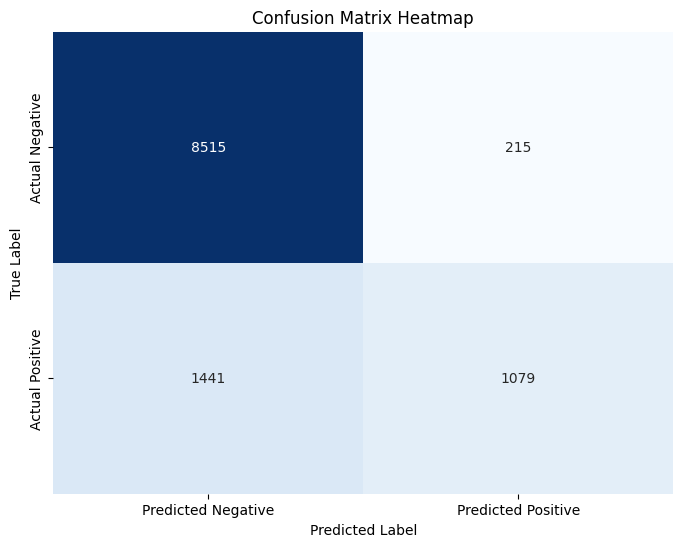

In [ ]:
conf_matrix2 =confusion_matrix(y_test, y_pred2)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix2, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()

In [ ]:
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred_knn = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_knn)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 88.67%
